In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sns.axes_style("whitegrid")
sns.set_context("paper")
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Example link for bills: https://www.pro-football-reference.com/teams/buf/2021.htm
# W-L%: https://www.pro-football-reference.com/years/2021/
stats = pd.read_csv("team-stats.csv")
stats.head()

,Team,W-L%,PF,Yds,Ply,Y/P,TO,FL,1stD,Cmp,...,Yds.3,1stPy,#Dr,Sc%,TO%,Start,Time,Plays,Yds.4,Pts
0,Bills,0.647,483,6493,1143,5.7,22,6,398,415,...,980,28,186,45.2,11.3,Own 32.2,2:54,6.32,34.8,2.56
1,Patriots,0.588,462,6008,1052,5.7,23,10,362,364,...,854,36,175,48.0,12.6,Own 31.6,2:59,6.23,34.3,2.54
2,Dolphins,0.529,341,5219,1097,4.8,26,12,325,404,...,825,32,186,30.1,12.4,Own 28.0,2:47,6.06,27.9,1.61
3,Jets,0.235,310,5208,1036,5.0,27,7,310,357,...,860,28,187,29.4,14.4,Own 27.5,2:32,5.68,27.8,1.61
4,Titans,0.706,419,5822,1133,5.1,25,11,362,359,...,973,34,185,38.9,13.0,Own 29.7,3:04,6.30,31.4,2.16


In [3]:
stats.describe()

,W-L%,PF,Yds,Ply,Y/P,TO,FL,1stD,Cmp,Att,...,1stD.2,Pen,Yds.3,1stPy,#Dr,Sc%,TO%,Plays,Yds.4,Pts
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.501938,390.687500,5840.531250,1076.531250,5.418750,22.062500,8.312500,345.500000,378.781250,584.750000,...,113.562500,100.531250,867.000000,30.687500,183.562500,37.912500,11.525000,6.045937,31.806250,2.057500
std,0.170314,76.613583,615.325143,49.523526,0.467276,4.765044,2.220687,35.971315,46.309432,58.634461,...,22.989391,14.509139,136.814685,4.035628,8.488845,6.710115,2.674371,0.352346,3.794218,0.419977
min,0.176000,253.000000,4727.000000,954.000000,4.600000,13.000000,4.000000,266.000000,293.000000,494.000000,...,75.000000,69.000000,620.000000,22.000000,168.000000,26.400000,6.400000,5.220000,25.100000,1.310000
25%,0.412000,332.500000,5223.500000,1049.000000,5.000000,19.000000,6.750000,322.750000,350.250000,539.500000,...,95.750000,94.250000,790.500000,27.750000,177.750000,32.650000,9.500000,5.812500,29.175000,1.695000
50%,0.529000,391.000000,5861.500000,1071.000000,5.550000,22.500000,8.500000,343.500000,370.500000,593.000000,...,111.500000,103.500000,855.000000,31.000000,183.500000,38.700000,12.100000,6.050000,32.400000,2.045000
75%,0.605750,453.250000,6331.750000,1116.250000,5.800000,25.250000,10.000000,363.250000,408.250000,612.000000,...,129.250000,111.000000,978.500000,34.000000,189.250000,43.925000,13.325000,6.277500,34.825000,2.460000
max,0.765000,530.000000,6919.000000,1185.000000,6.100000,30.000000,12.000000,419.000000,492.000000,731.000000,...,163.000000,127.000000,1104.000000,38.000000,199.000000,48.200000,15.900000,6.940000,40.100000,2.710000


In [4]:
# Check to see NA values (there are none)
# stats.isna().sum()

In [5]:
# Drop "Start" and "Time". These could be converted to strictly numerical values, but right now they are not
stats = stats.drop(["Start", "Time"], axis=1)

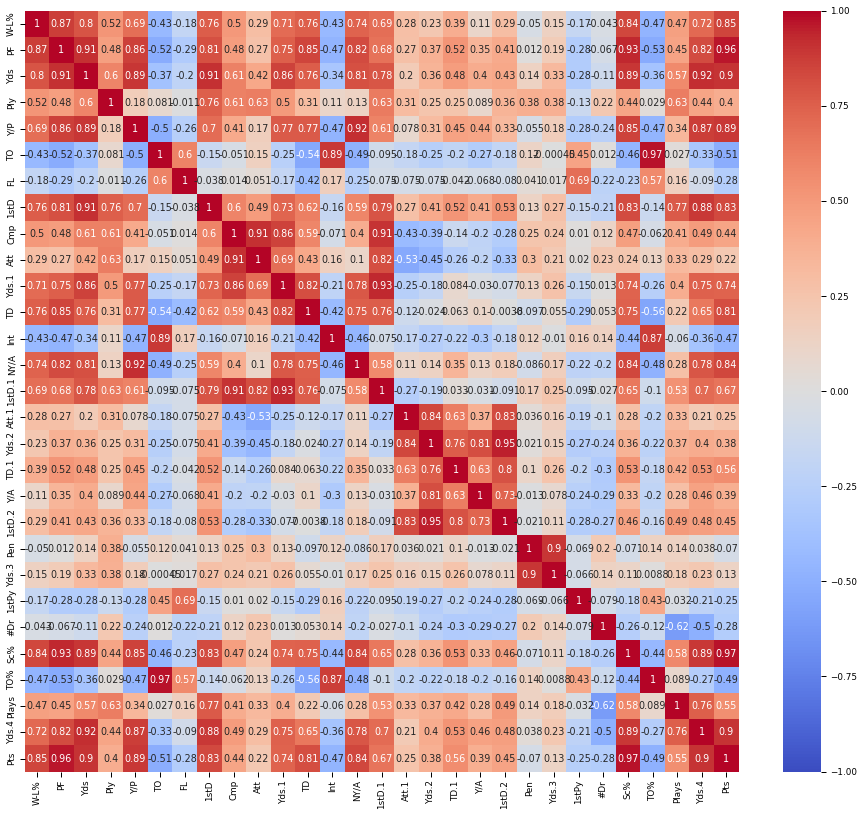

In [6]:
# Plot correlation
plt.figure(figsize=(16,14))
p=sns.heatmap(stats.corr(), annot=True, vmin=-1, vmax=1,cmap ="coolwarm")

In [7]:
# see which variables have an effect on win/loss percentage
# sns.pairplot(stats, diag_kind='kde');

## Linear Regression

In [8]:
# create X and y
stats2 =stats.drop('Team',axis=1)
X = stats2.drop(['W-L%'], axis = 1)
y = stats[['W-L%']]

In [9]:
# split data into train and test using all X features
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=1)

In [10]:
# A negative R^2 means the model fits the data very very poorly.
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test,y_test)

-3.564790834688587

In [11]:
# chose the features with statistical significance
X_best = X[['PF','Yds','Ply','1stD','Att','Yds.1','Int','NY/A', '1stD.1', 'Pen']]

In [12]:
# split data into train and test using the best X features, determined by 
X_train,X_test,y_train,y_test = train_test_split(X_best,y, test_size=0.25,random_state=1)

In [13]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear")
for idx, col in enumerate(X_train.columns):
    print("Coefficient:  %s  \t=  %4f"%(col, linear_model.coef_[0][idx]))

Linear
Coefficient:  PF  	=  0.000865
Coefficient:  Yds  	=  -0.000251
Coefficient:  Ply  	=  0.001447
Coefficient:  1stD  	=  0.001815
Coefficient:  Att  	=  -0.001332
Coefficient:  Yds.1  	=  0.000068
Coefficient:  Int  	=  -0.012356
Coefficient:  NY/A  	=  0.049606
Coefficient:  1stD.1  	=  0.003015
Coefficient:  Pen  	=  -0.000225


In [14]:
# Linear model accuracy
linear_model.score(X_test,y_test)

0.6818587791712609

In [15]:
print("The accuracy of the model is %3.3f"%(linear_model.score(X_test,y_test)))

The accuracy of the model is 0.682


## Ridge Regression

In [16]:
# set the alphas
alphas = np.logspace(-3,5,100)

In [17]:
ridge = Ridge(normalize = True)
coefs = []
mses = []

for a in alphas:
    ridge.set_params(alpha = a) #alpha
    ridge.fit(X_train, y_train) #fit
    coefs.append(ridge.coef_)    #save coefficients
    pred = ridge.predict(X_test)  #find predicitions
    mses.append(mean_squared_error(y_test, pred) ) #save the MSE
#
coefs = np.array(coefs).reshape(alphas.shape[0],-1)
mses = np.array(mses).reshape(alphas.shape[0],-1)

features = stats.columns

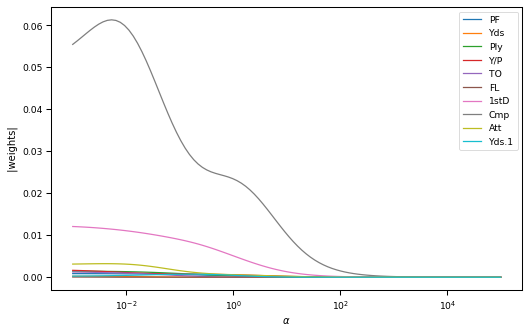

In [18]:
fig, ax = plt.subplots(figsize=(8.1, 5),dpi= 75)
ax.plot(alphas, np.abs(coefs))
ax.set_xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel(' |weights| ')
plt.legend(features)
plt.legend(X.columns)
plt.show()

In [19]:
### nice function to find best alpha
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
print("alpha_best = %4f"%ridgecv.alpha_)

alpha_best = 19.179103


In [20]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge.coef_[0], index = X_best.columns)) # Print coefficients
print("R2  = %4f"%(ridge.score(X_test,y_test)))
print("MSE = %4f"%mean_squared_error(y_test, pred)) 

PF        0.000963
Yds      -0.000253
Ply       0.001373
1stD      0.001847
Att      -0.001703
Yds.1     0.000148
Int      -0.011398
NY/A      0.000795
1stD.1    0.002751
Pen      -0.000262
dtype: float64
R2  = 0.684251
MSE = 0.007949


In [21]:
print("The accuracy of the model is %3.3f"%(ridge.score(X_test,y_test)))

The accuracy of the model is 0.684


## Lasso Regression

In [22]:
lasso = Lasso(max_iter = 500)
coefs = []
mses = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    pred = lasso.predict(scale(X_test))
    mses.append(mean_squared_error(y_test, pred) )
#
coefs = np.array(coefs).reshape(alphas.shape[0],-1)
mses = np.array(mses).reshape(alphas.shape[0],-1)

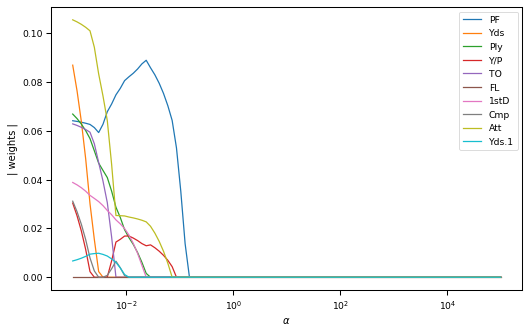

In [23]:
fig, ax = plt.subplots(figsize=(8.1, 5),dpi= 75)
ax.plot(alphas, np.abs(coefs))
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel(r'$\alpha$')
plt.ylabel('| weights |')
plt.legend(X.columns)
plt.show()

In [24]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(scale(X_train), np.ravel(y_train))
print("alpha_best = %4f"%lassocv.alpha_)

alpha_best = 0.000606


In [25]:
##now use this alpha to train a model
lasso.set_params(alpha=lassocv.alpha_)
pred5 = lassocv.predict(scale(X_test))
print(pd.Series(lassocv.coef_, index = X_best.columns)) # Print coefficients
print("R2  = %4f"%(lassocv.score(scale(X_test),y_test)))
print("MSE = %4f"%mean_squared_error(y_test, pred5)) 

PF        0.064611
Yds      -0.107065
Ply       0.070386
1stD      0.040350
Att      -0.064003
Yds.1     0.000000
Int      -0.040681
NY/A      0.039424
1stD.1    0.106997
Pen      -0.005659
dtype: float64
R2  = 0.214061
MSE = 0.019787
